# import Library
- pandas : 1.1.0
- numpy : 1.19.1

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print('pandas',pd.__version__)
print('numpy',np.__version__)

pandas 1.1.0
numpy 1.19.1


# Load Data
- 제공된 데이터를 불러온 후 digit, letter, pixel(784) 를 각각 변수에 저장

In [3]:
# TRAIN
train = pd.read_csv('data/train.csv')
train_digit = train['digit'].values
train_letter = train['letter'].values
train_img = train.iloc[:,3:].values.reshape(-1, 28, 28, 1).astype(np.int)

# TEST
test = pd.read_csv('data/test.csv')
test_img = test.iloc[:,2:].values.reshape(-1, 28, 28, 1).astype(np.int)
X_test_letter = test['letter'].values

del train, test

In [4]:
print('digit  : ', np.unique(train_digit))
print('letter : ', np.unique(train_letter))

digit  :  [0 1 2 3 4 5 6 7 8 9]
letter :  ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']


# visualize
### 시각화를 통해 추측할 수 있는 내용
- fig
    - left fig : 원본 데이터
    - right fig : 숫자 부분이라 생각되는 부분을 임의로 추출
- letter는 영어 알파벳인데 데이터에는 모두 대문자로 있지만 이미지는 대소문자 구분이 없는 것을 확인 했습니다. 즉, 실제로는 A-Z(26), a-z(26) 으로 52개가 있는 것으로 보입니다.
- 이미지를 봤을 때 데이터가 만들어진 과정을 추측해보면 letter가 먼저 그려지고 digit을 그리는데 이 때 digit은 letter와 겹치는 부분만 남기고 나머지 부분은 제거하는 방식 인 것 같습니다. -> 단지 제 생각입니다...!
- 겹쳐져 있는 부분의 pixel 값은 약간 다른 것을 확인할 수 있었습니다.
- 임의로 일정 pixel 이상의 값을 가진 것만 남겨 이미지를 출력해보면 어떤 형태로 데이터가 생성 됐을지 예상할 수 있습니다.

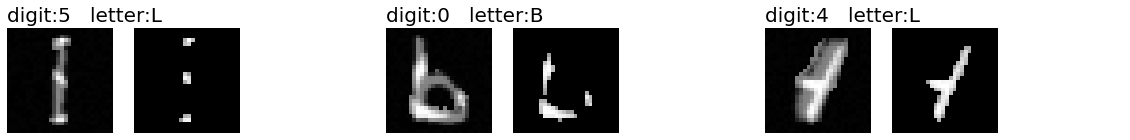

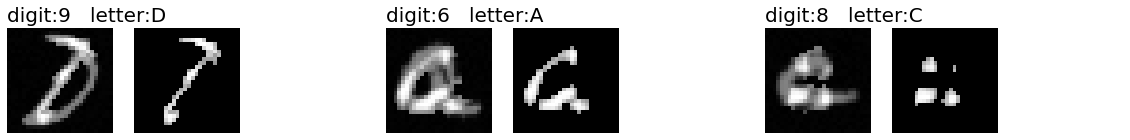

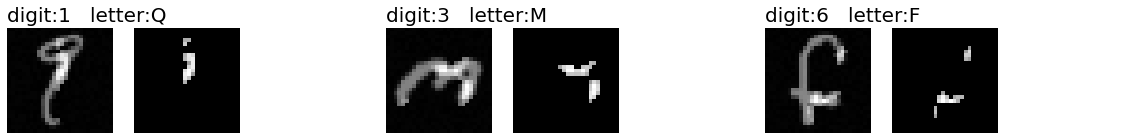

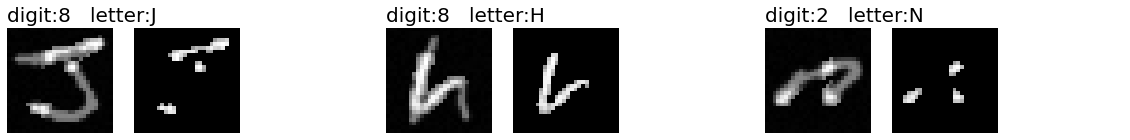

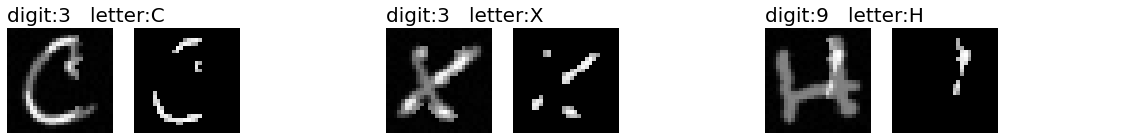

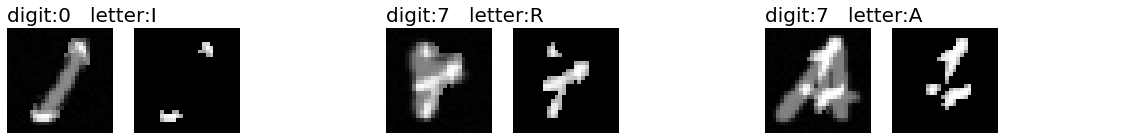

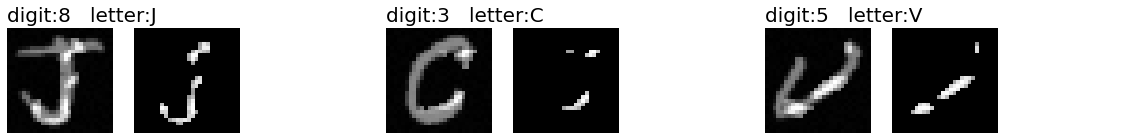

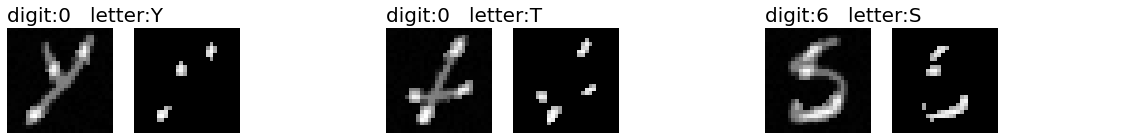

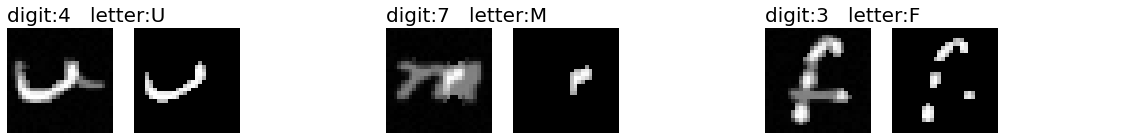

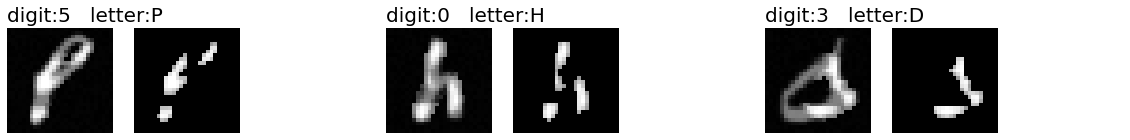

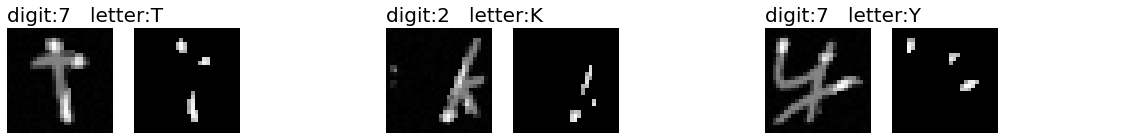

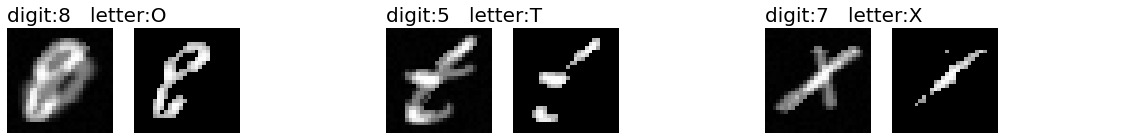

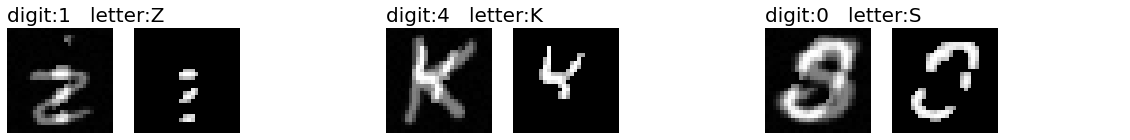

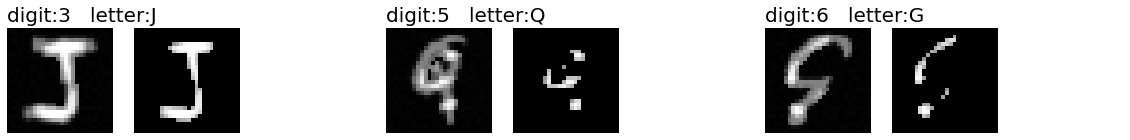

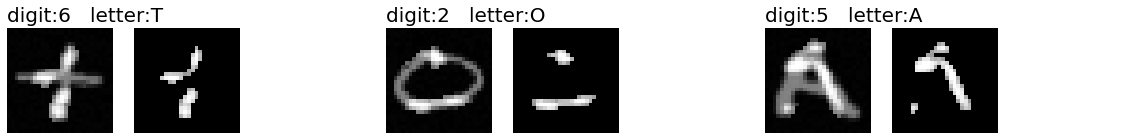

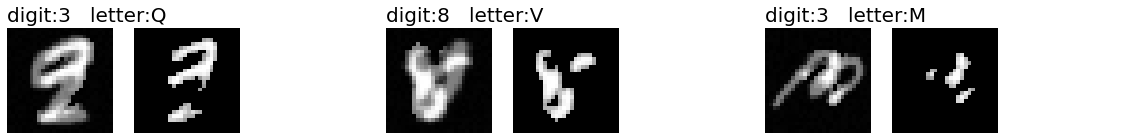

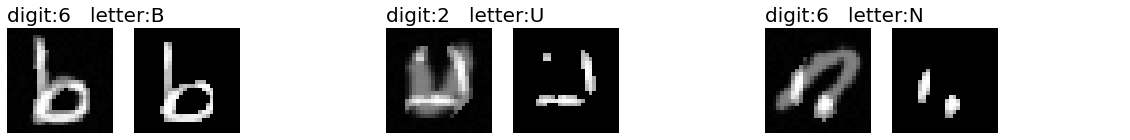

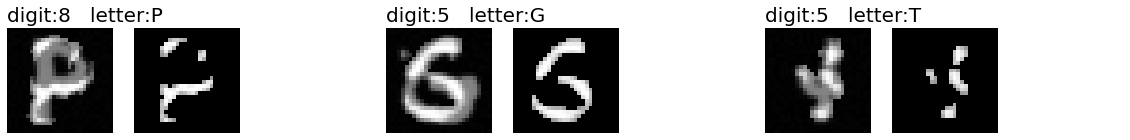

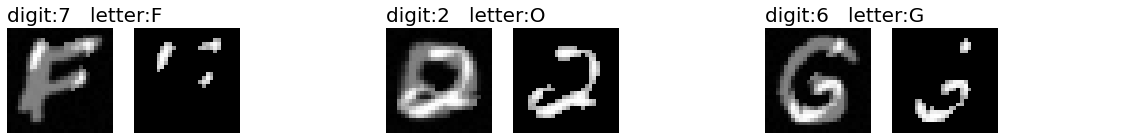

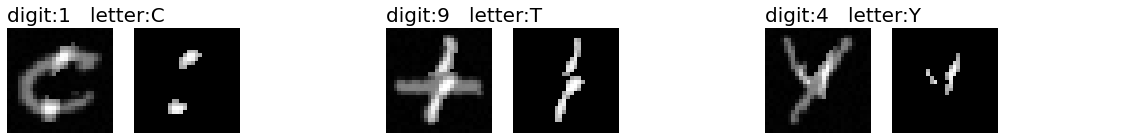

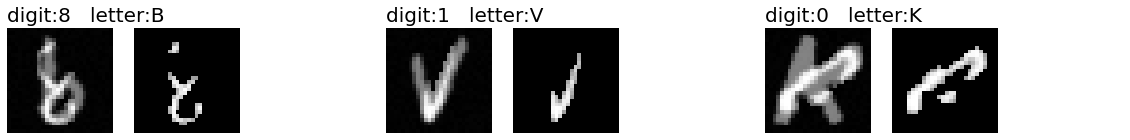

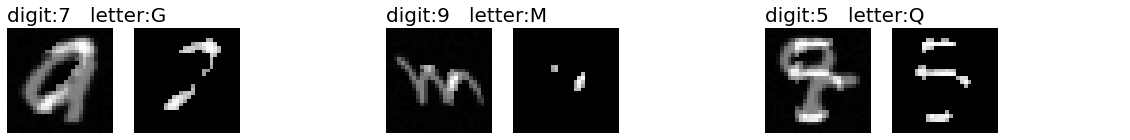

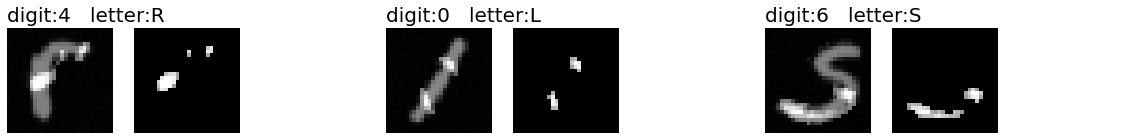

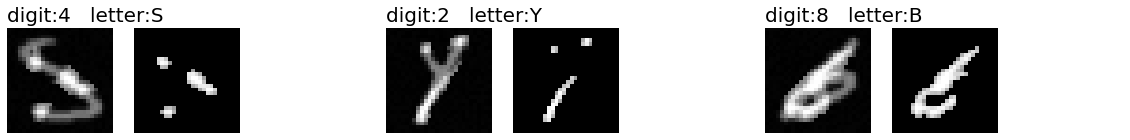

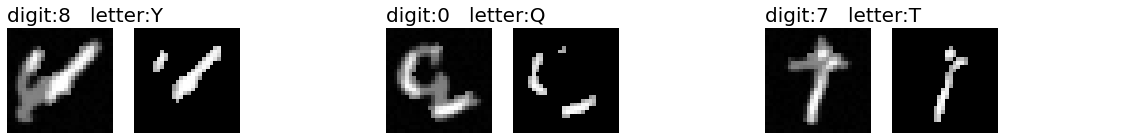

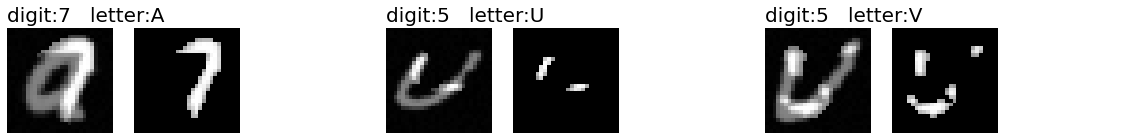

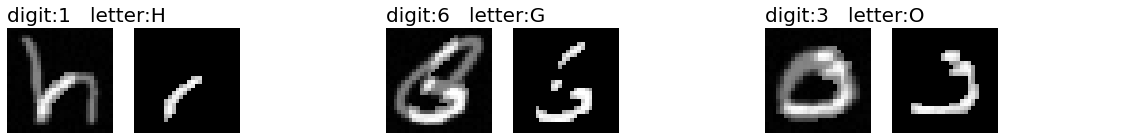

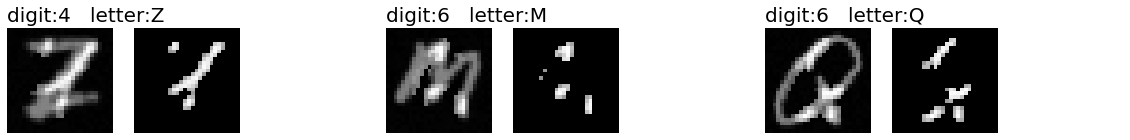

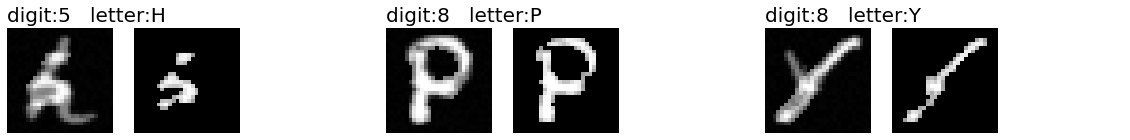

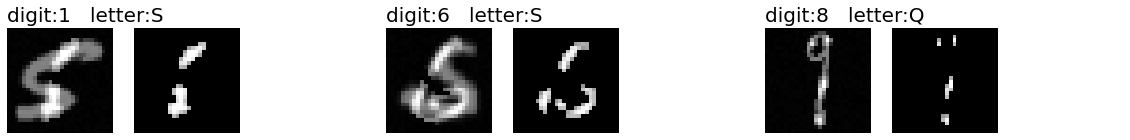

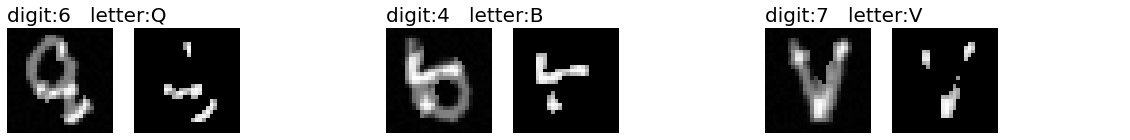

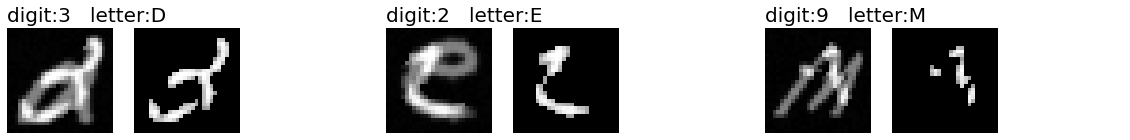

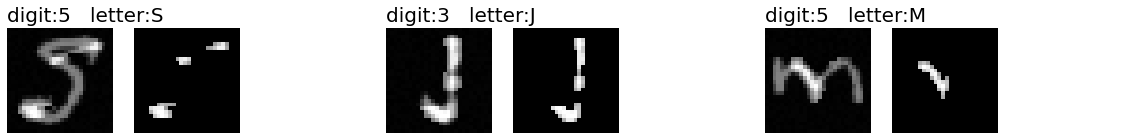

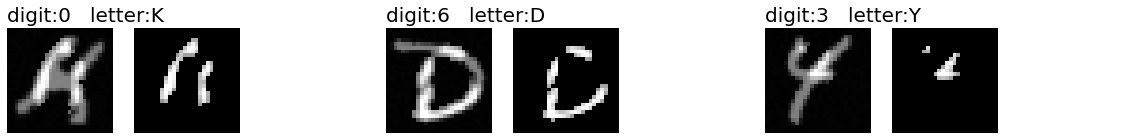

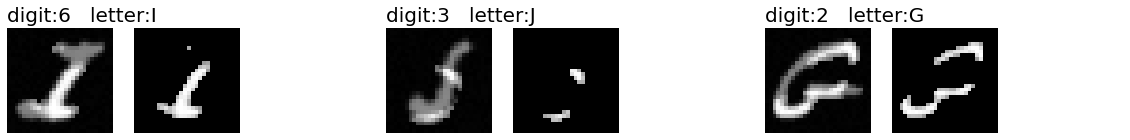

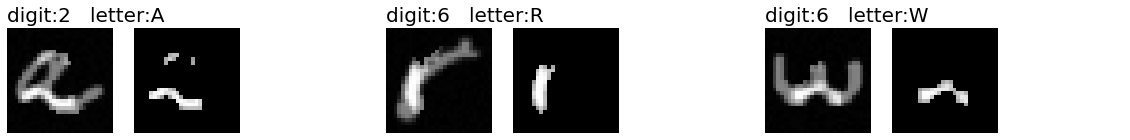

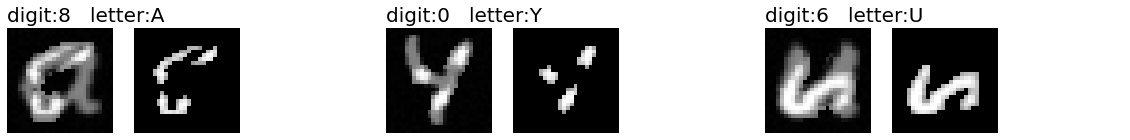

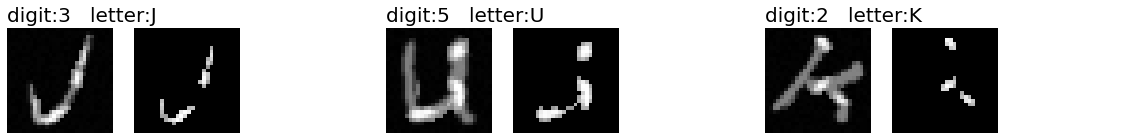

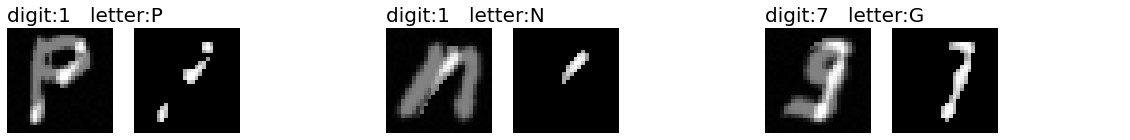

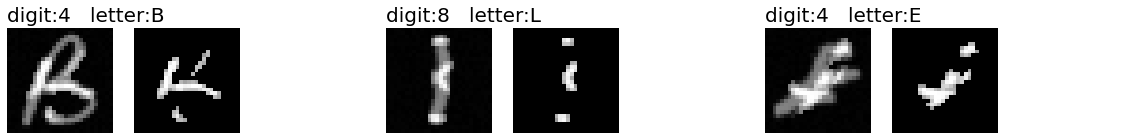

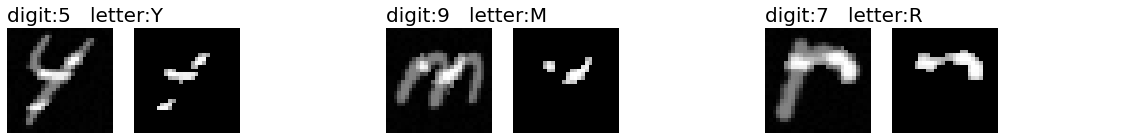

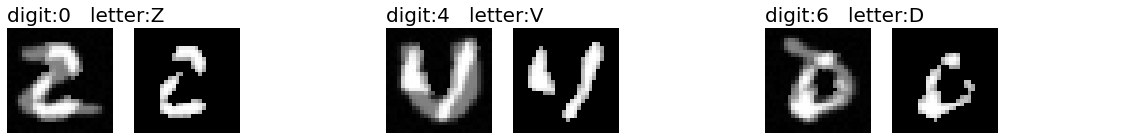

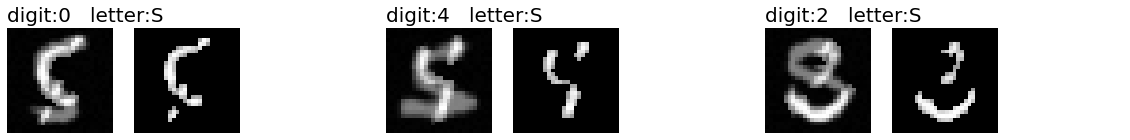

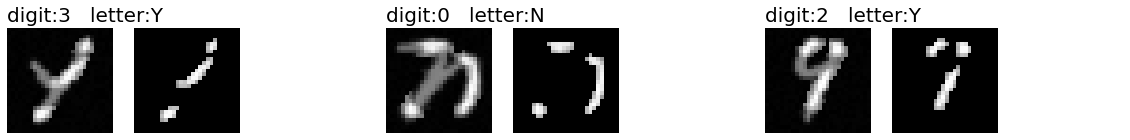

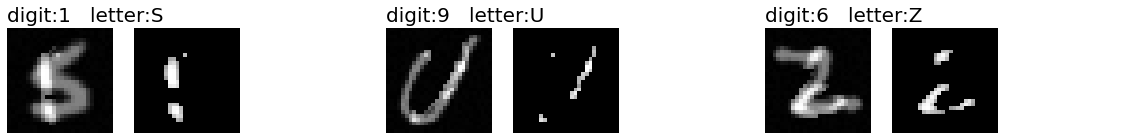

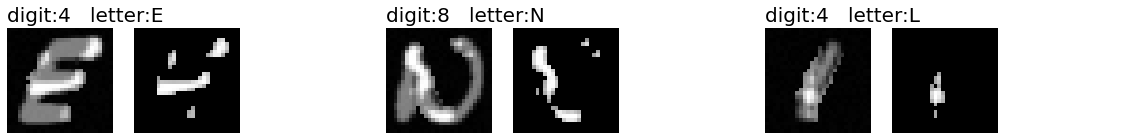

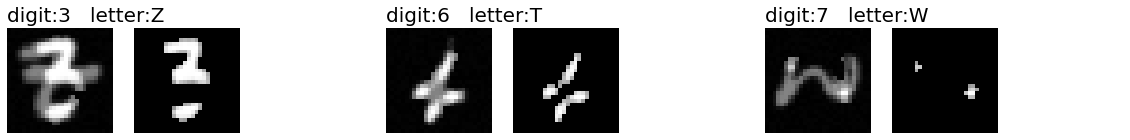

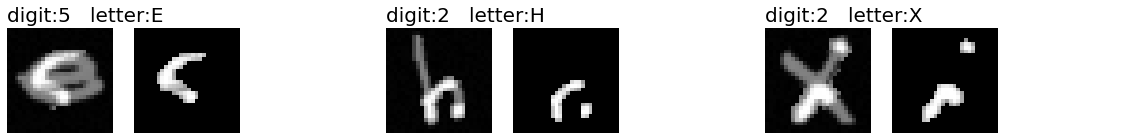

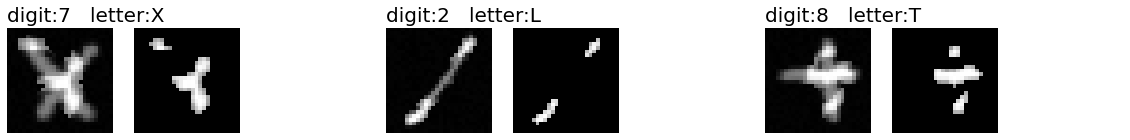

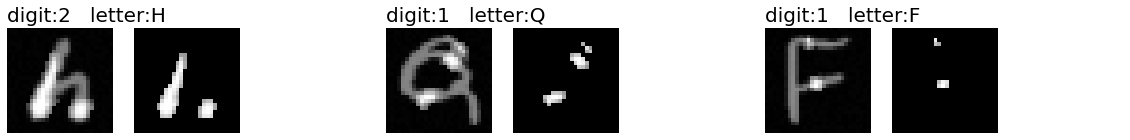

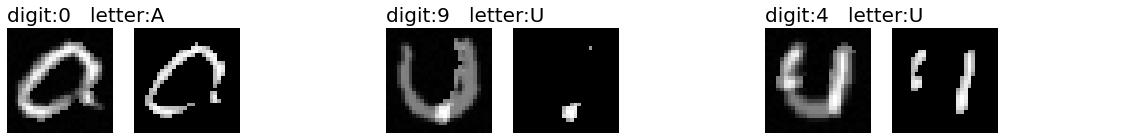

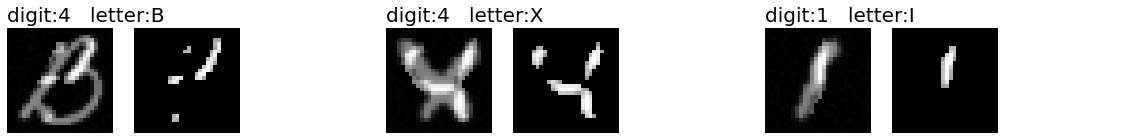

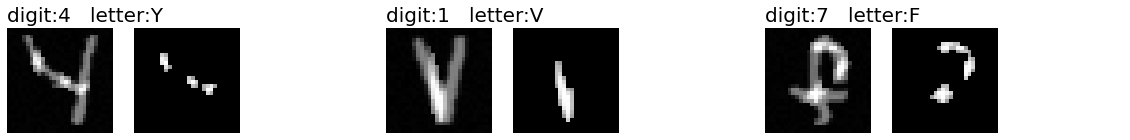

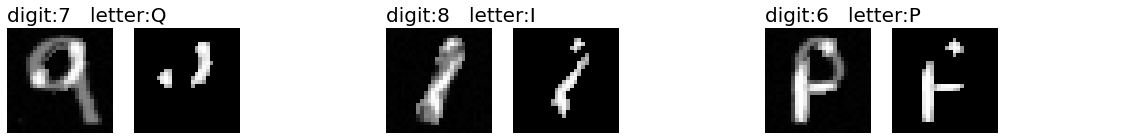

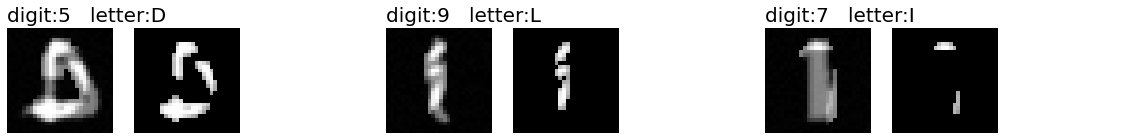

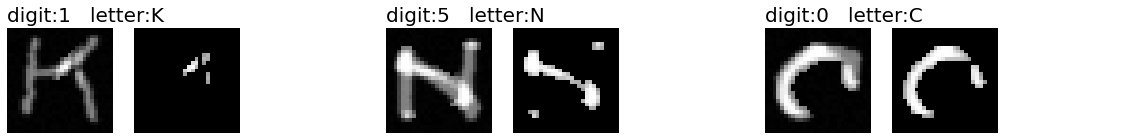

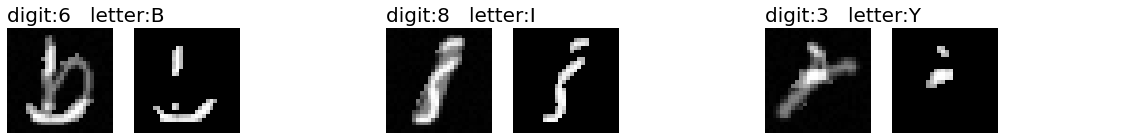

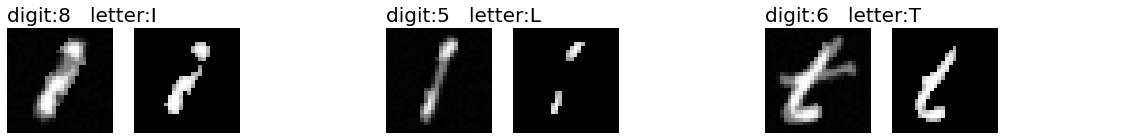

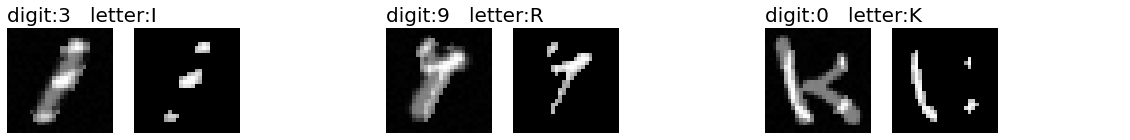

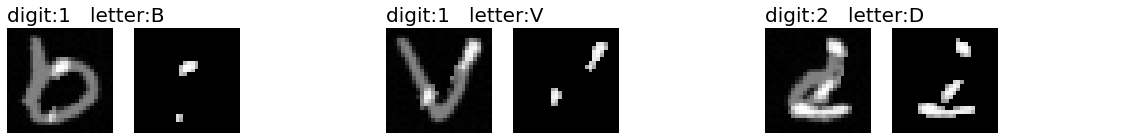

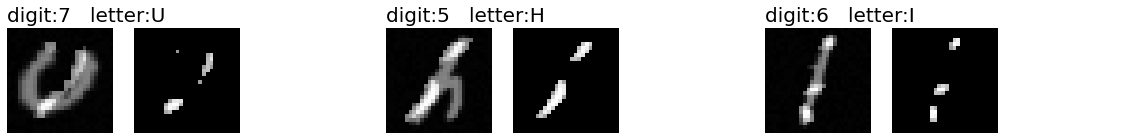

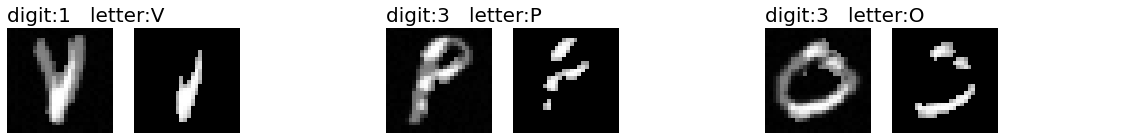

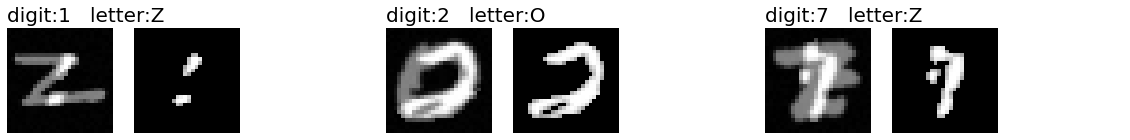

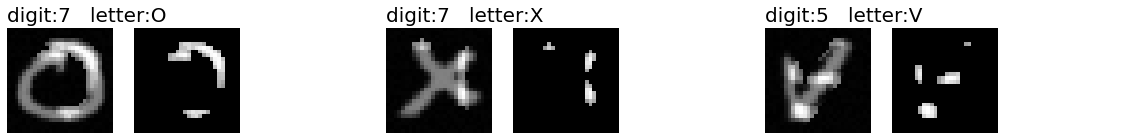

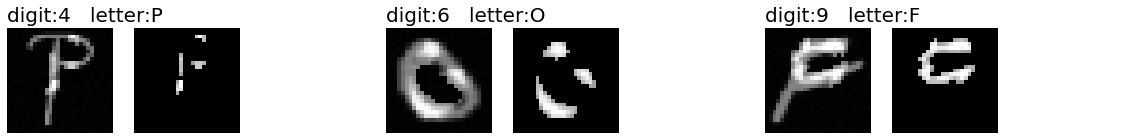

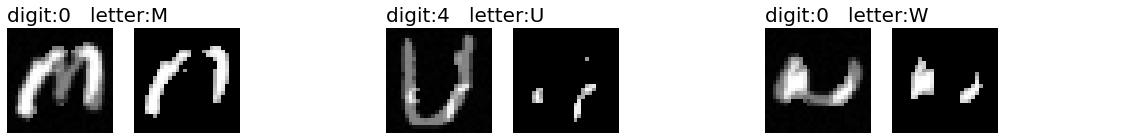

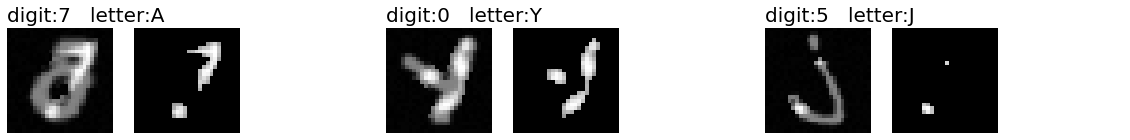

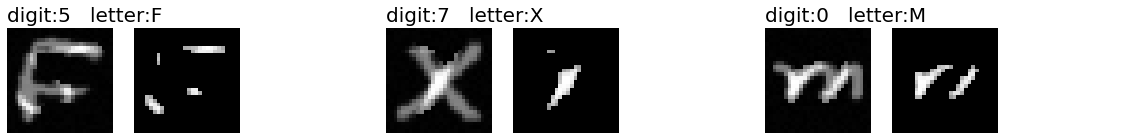

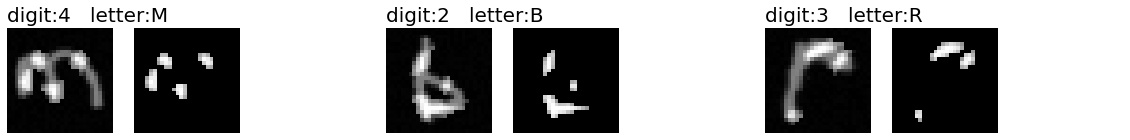

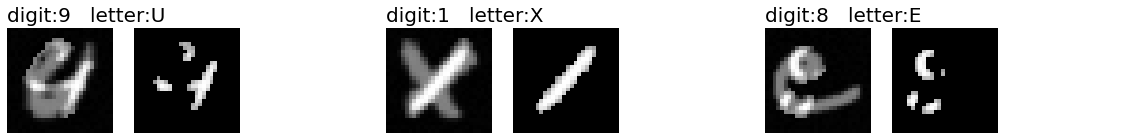

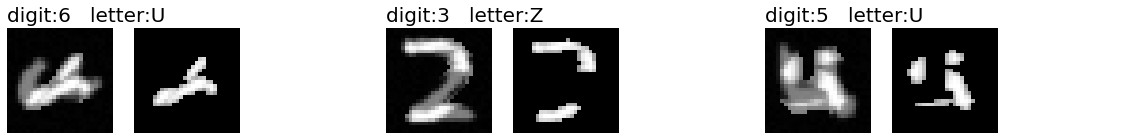

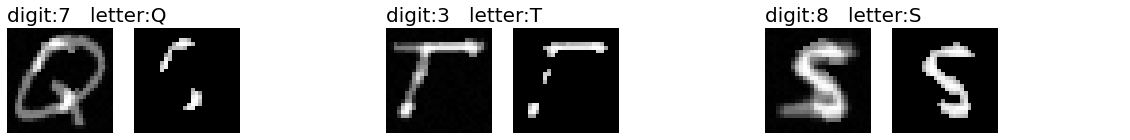

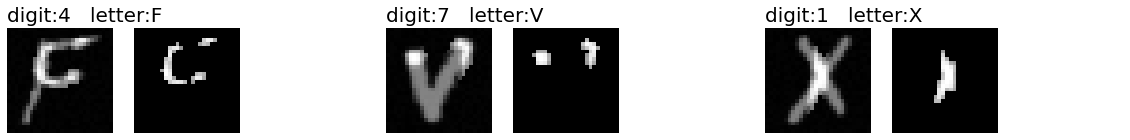

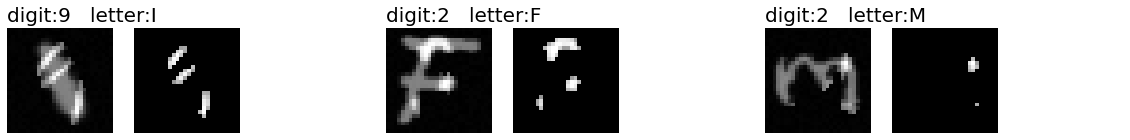

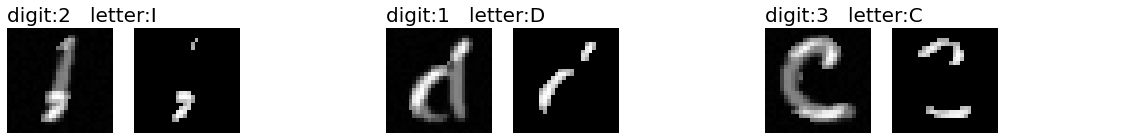

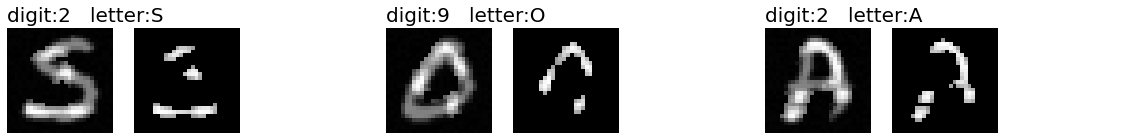

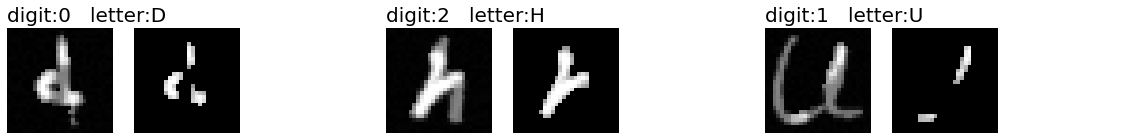

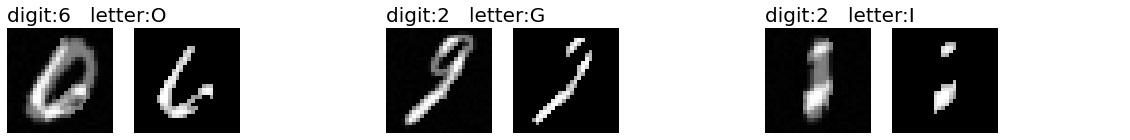

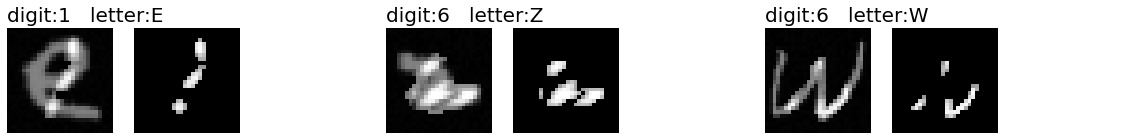

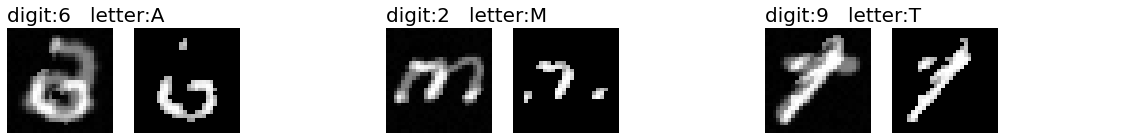

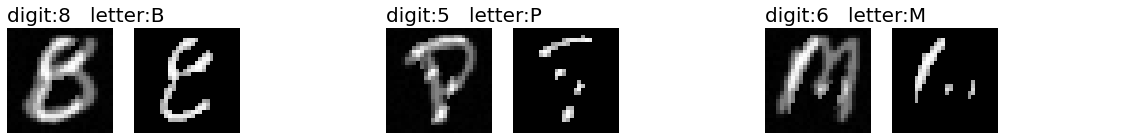

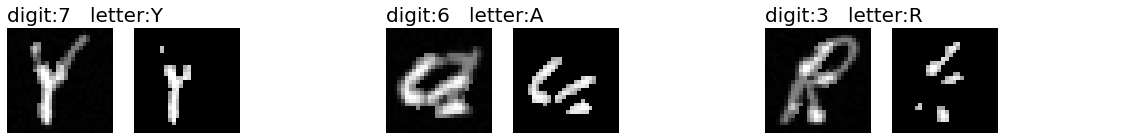

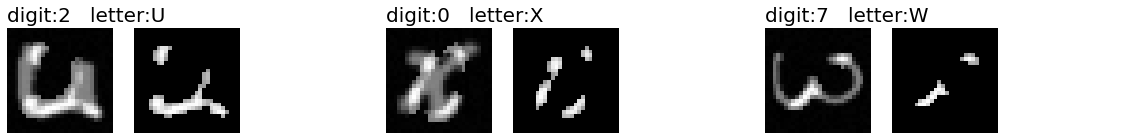

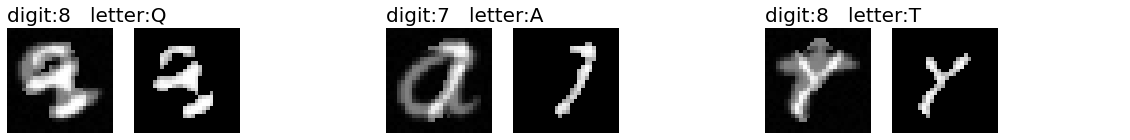

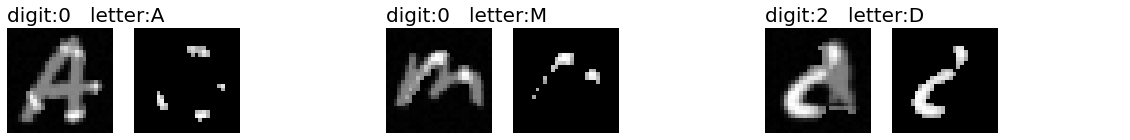

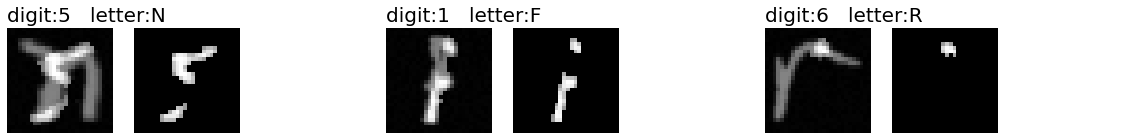

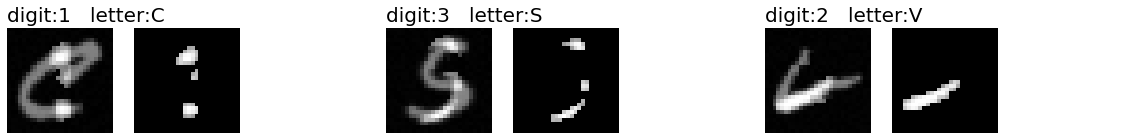

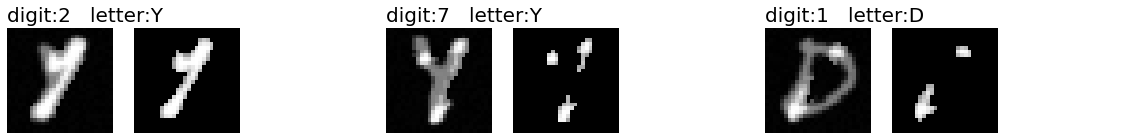

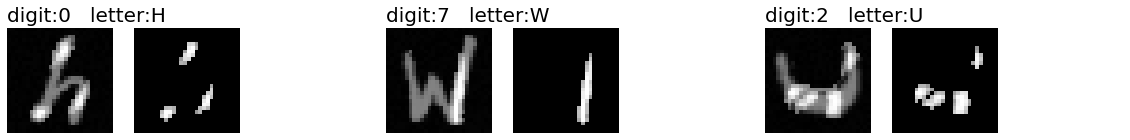

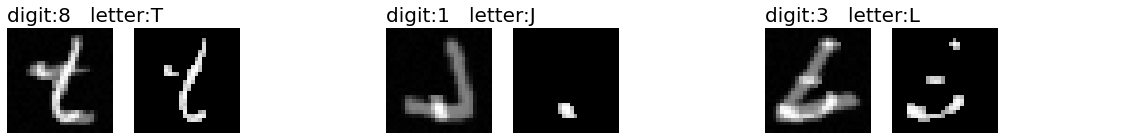

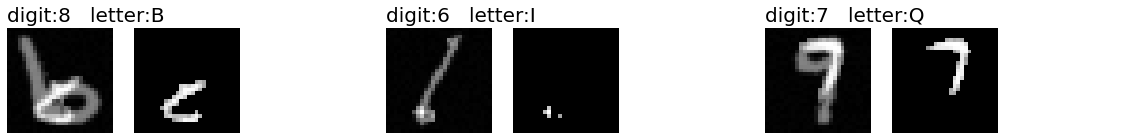

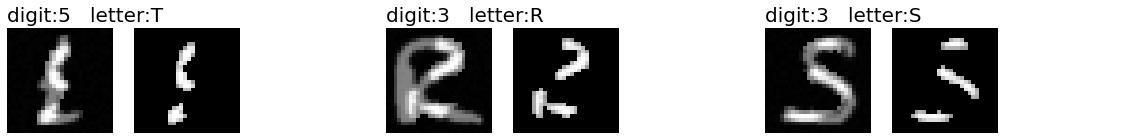

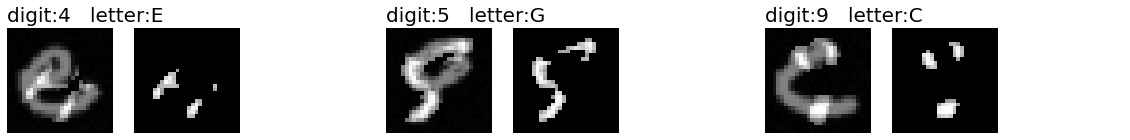

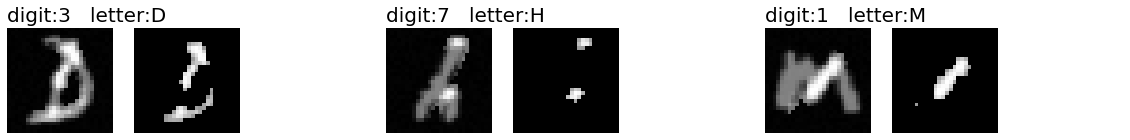

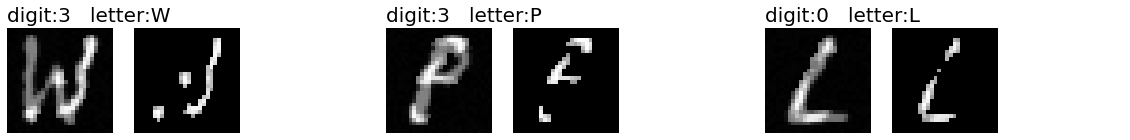

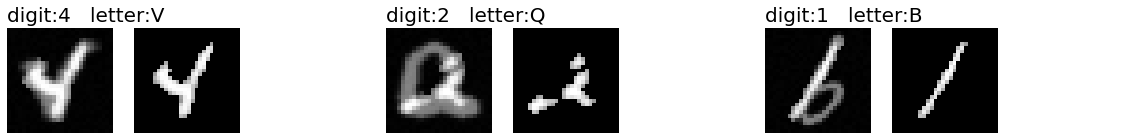

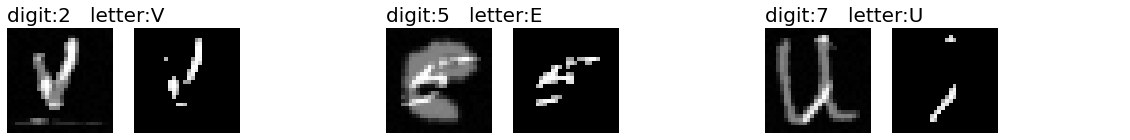

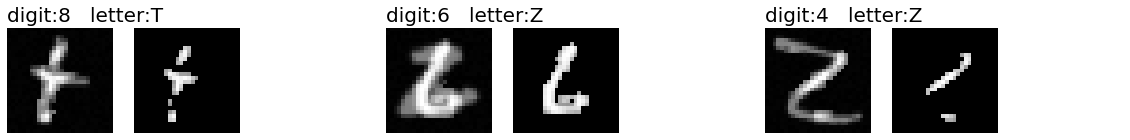

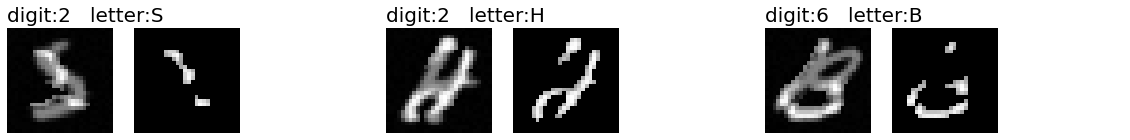

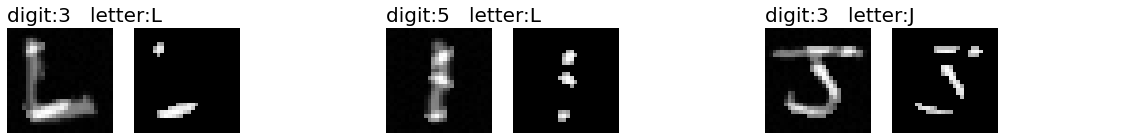

In [5]:
for idx in range(0, 300, 3):
    plt.figure(figsize=(20,30))
    plt.subplot(1,9,1)
    plt.imshow(train_img[idx].reshape(28,28),cmap='gray')
    plt.axis('off')
    
    plt.title('digit:{}   letter:{}'.format(train_digit[idx], train_letter[idx]), loc='left', fontsize=20)

    plt.subplot(1,9,2)
    data = np.where(train_img>=150, train_img, 0)
    plt.imshow(data[idx].reshape(28,28),cmap='gray')
    plt.axis('off')

    plt.subplot(1,9,3)
    plt.imshow(np.zeros((28,28,3))+1,cmap='gray')
    plt.axis('off')
    
    
    plt.subplot(1,9,4)
    plt.imshow(train_img[idx+1].reshape(28,28),cmap='gray')
    plt.axis('off')
    
    plt.title('digit:{}   letter:{}'.format(train_digit[idx+1], train_letter[idx+1]), loc='left', fontsize=20)

    plt.subplot(1,9,5)
    data = np.where(train_img>=150, train_img, 0)
    plt.imshow(data[idx+1].reshape(28,28),cmap='gray')
    plt.axis('off')

    plt.subplot(1,9,6)
    plt.imshow(np.zeros((28,28,3))+1,cmap='gray')
    plt.axis('off')
    
    
    plt.subplot(1,9,7)
    plt.imshow(train_img[idx+2].reshape(28,28),cmap='gray')
    plt.axis('off')
    
    plt.title('digit:{}   letter:{}'.format(train_digit[idx+2], train_letter[idx+2]), loc='left', fontsize=20)

    plt.subplot(1,9,8)
    data = np.where(train_img>=150, train_img, 0)
    plt.imshow(data[idx+2].reshape(28,28),cmap='gray')
    plt.axis('off')

    plt.subplot(1,9,9)
    plt.imshow(np.zeros((28,28,3))+1,cmap='gray')
    plt.axis('off')
    
plt.show()

### 데이터를 눈으로 직접 보고 어떤 방식으로 접근하면 좋을 지 댓글로 토론 해보는 것도 좋을 것 같네요 ! 같이 공부합시다.
- letter 정보를 어떻게 활용할 수 있을지. -> letter의 값을 one-hot-vector로 만든 후 layer의 입력으로 활용해 보는 것도 ? ..
- 적은 데이터를 통해 어떤 방식을 활용하면 효율적인 학습을 할 수 있을지.
- public LB는 20480개중 1%의 데이터로 약 205개 정도로만 측정이되니 나중에 전체 데이터로 측정 될 때는 또 다르게 나올 수 있을 것 같습니다.

### 도움이 됐다면 ▲ Upvote 살포시 눌려주세요 !